In [34]:
!pip install opencv-python

In [35]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import matplotlib.pylab as plt
plt.style.use('ggplot')

In [36]:
# Read the video file
video = cv2.VideoCapture("nature.mp4")

# Check if the video file was successfully opened
if not video.isOpened():
    print("Error opening video file")

# Extract the sequence of images from the video
frame_count = 0
while video.isOpened():
    # Read the next frame from the video
    success, frame = video.read()

    # Check if the frame was successfully read
    if not success:
        break

    # Save the frame as an image file
    cv2.imwrite("./frames/frame%d.jpg" % frame_count, frame)

    # Increment the frame count
    frame_count += 1

# Close the video file
video.release()
print("video extract completed")

video extract completed


In [37]:
frames = glob('frames/*.jpg')

In [38]:
len(frames)

119

In [39]:
path = "./frames/frame1.jpg"
img_mpl = plt.imread(path)
img_cv2 = cv2.imread(path)
print(img_mpl.shape) 
print(img_cv2.shape)

(312, 640, 3)
(312, 640, 3)


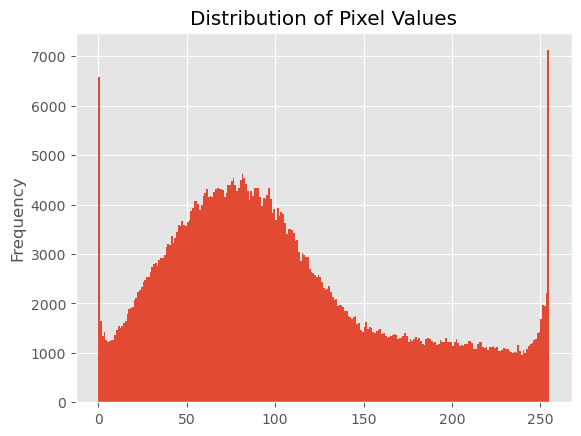

In [40]:
pd.Series(img_mpl.flatten()).plot(kind='hist', bins=255, title='Distribution of Pixel Values')
plt.show()

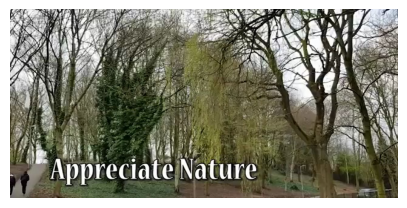

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

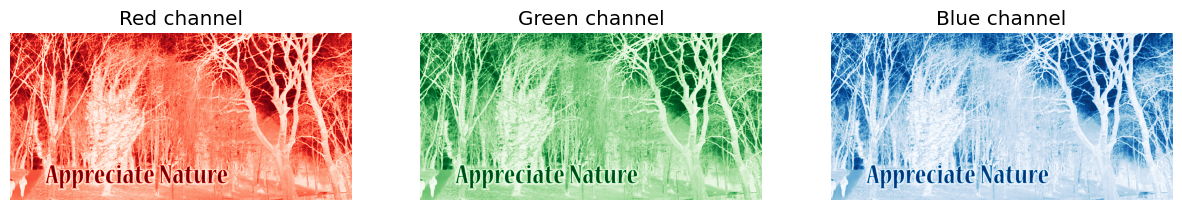

In [42]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

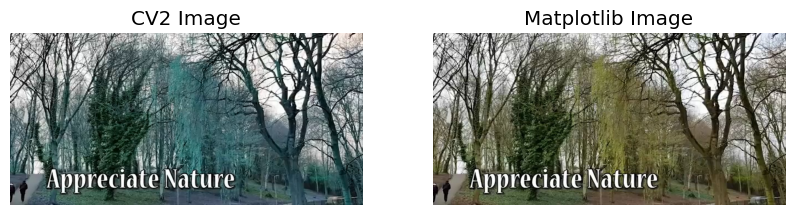

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()
# Open CV works in BGR
# Regular image works in RGB

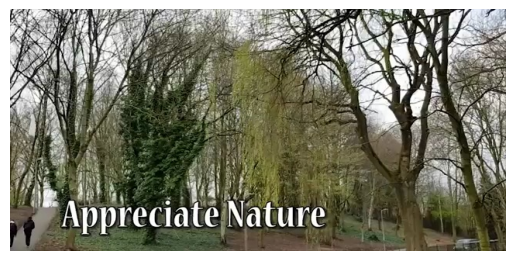

In [44]:
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

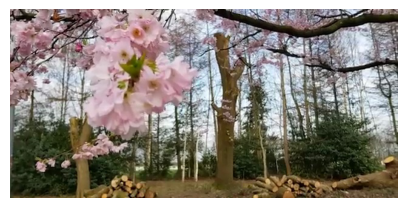

In [45]:
img = plt.imread("frames/frame50.jpg")
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img)
ax.axis('off')
plt.show()

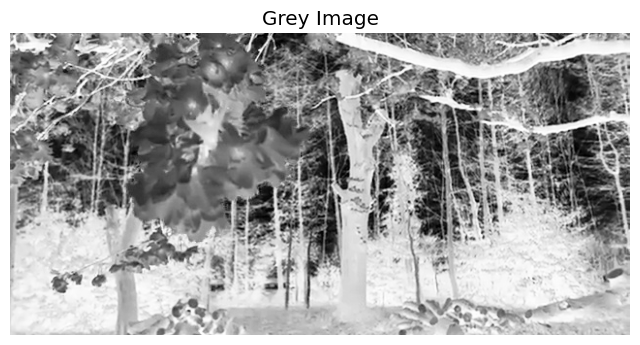

In [46]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

In [47]:
print(img_gray)
print(len(img_gray))

[[147 155 149 ... 144 131 140]
 [146 149 142 ... 162 159 163]
 [123 129 127 ... 160 180 167]
 ...
 [ 60  59  61 ...  79  80  81]
 [ 57  58  60 ...  82  82  81]
 [ 57  58  61 ...  82  81  82]]
312


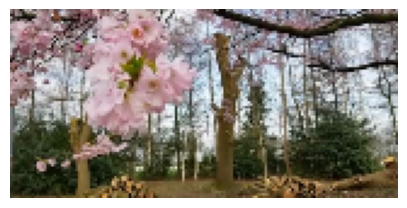

In [48]:
#Resize
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

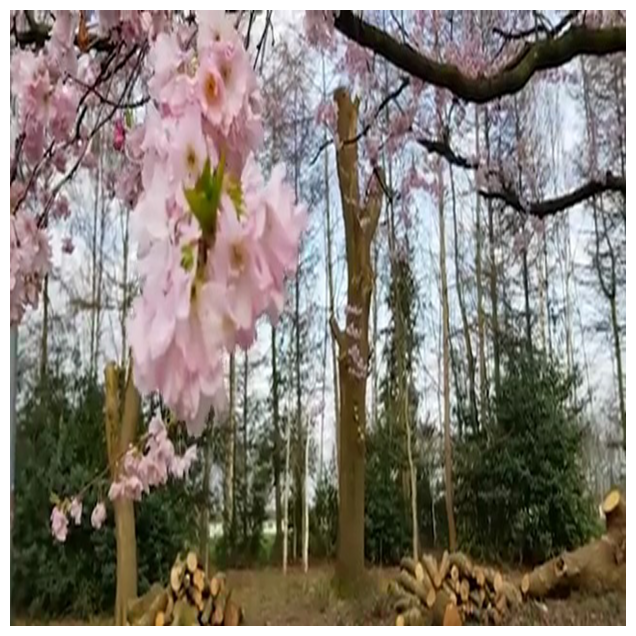

In [49]:
#Interpolation
img_resize = cv2.resize(img, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

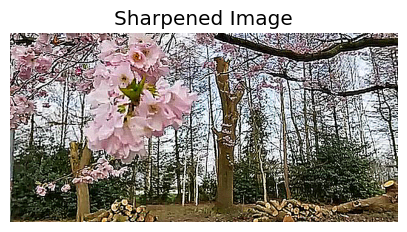

In [50]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

In [51]:
plt.imsave('mpl_dog.png', sharpened)
cv2.imwrite('cv2_dog.png', sharpened)

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


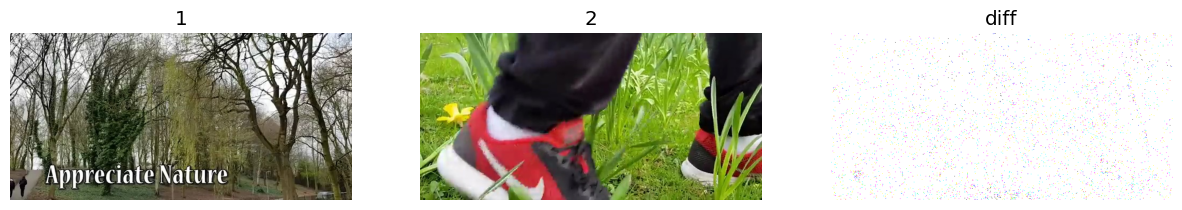

In [52]:
import cv2
import numpy as np

# Load the images
img1 = cv2.cvtColor(cv2.imread('./frames/frame1.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('./frames/frame100.jpg'), cv2.COLOR_BGR2RGB)


# Calculate the Laplacian of each image
lap1 = cv2.Laplacian(img1, cv2.CV_64F)
lap2 = cv2.Laplacian(img2, cv2.CV_64F)

# Calculate the absolute difference between the two Laplacian images
diff = cv2.absdiff(lap1, lap2)


# Threshold the difference image to highlight the sharpest transitions
_, thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img1)
axs[1].imshow(img2)
axs[2].imshow(thresh)

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title('1')
axs[1].set_title('2')
axs[2].set_title('diff')
plt.show()